# Set and import

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.externals import joblib
%run ../lib/load.py

/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [4]:
path = '/Users/zhaoziqin/Desktop/train_set/'
data = load.load_data(path+'label.csv')
points_path = '/Users/zhaoziqin/Desktop/train_set/points/'
X = load.load_points(points_path,data)
y= data['emotion_idx'].to_numpy()

--- 14.970279932022095 seconds ---


# train-test split

In [5]:
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=123)

In [6]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(2000, 6006)
(500, 6006)
(2000,)
(500,)


# Baseline(GBM)

In [7]:
from sklearn.ensemble import GradientBoostingClassifier 
start_time = time.time()
baseline = GradientBoostingClassifier(n_estimators=22,max_depth=2)
gbm_model = GradientBoostingClassifier(n_estimators=22,max_depth=2).fit(train_x,train_y) 
print("--- %s seconds ---" % (time.time() - start_time))

--- 388.82324600219727 seconds ---


In [8]:
baseline_pred = gbm_model.predict(test_x)
baseline_accuracy = gbm_model.score(test_x,test_y)
print("Accuracy on the baseline model: %.4f" % (baseline_accuracy))
baseline_pred_train = gbm_model.predict(train_x)
print(classification_report(train_y, baseline_pred_train))
print(classification_report(test_y, baseline_pred))

Accuracy on the baseline model: 0.3660
              precision    recall  f1-score   support

           1       0.87      0.87      0.87        94
           2       0.92      0.93      0.92        95
           3       0.83      0.91      0.87       110
           4       0.82      0.87      0.84        97
           5       0.94      0.90      0.92        91
           6       0.86      0.83      0.84        78
           7       0.88      0.89      0.88        94
           8       0.88      0.94      0.91       104
           9       0.93      0.90      0.92        84
          10       0.84      0.84      0.84        87
          11       0.90      0.78      0.83        99
          12       0.97      0.85      0.91        80
          13       0.86      0.81      0.83        83
          14       0.81      0.93      0.86        99
          15       0.94      0.79      0.86        73
          16       0.87      0.91      0.89        91
          17       0.78      0.86      0.8

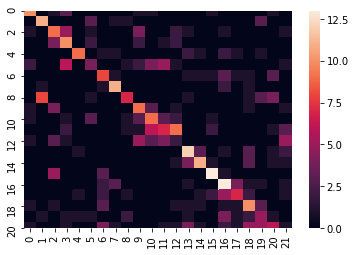

In [9]:
cm = confusion_matrix(test_y,baseline_pred)
sns.heatmap(cm)

## Cross-Validation of GBM

In [ ]:
start_time = time.time()
estimator = GradientBoostingClassifier()
parameters = {
   'max_depth': [1,2,3],
   'n_estimators': [50,100],
   'learning_rate': [0.1, 0.01, 0.05]
}

gscv_gbm = GridSearchCV(estimator = estimator , 
                        param_grid = parameters, 
                        scoring ='accuracy',
                        cv = 3,
                        n_jobs = -1)
gscv_gbm.fit(train_x, train_y)

In [10]:
GradientBoostingClassifier()

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
gscv_gbm.best_params_

In [7]:
start_time = time.time()
baseline = GradientBoostingClassifier(n_estimators=100,max_depth= 2,learning_rate=0.1)
gbm_model = baseline.fit(train_x,train_y) 
print("--- %s seconds ---" % (time.time() - start_time))

--- 1719.895252943039 seconds ---


In [8]:
baseline_pred_train = gbm_model.predict(train_x)
baseline_pred = gbm_model.predict(test_x)
baseline_accuracy_test = gbm_model.score(test_x,test_y)
baseline_accuracy_train = gbm_model.score(train_x,train_y)
print("Accuracy on the train(baseline model): %.4f" % (baseline_accuracy_train))
print("Accuracy on the test(baseline model): %.4f" % (baseline_accuracy_test))
print(classification_report(train_y, baseline_pred_train))
print(classification_report(test_y, baseline_pred))

Accuracy on the train(baseline model): 0.9980
Accuracy on the test(baseline model): 0.4180
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        94
           2       0.99      1.00      0.99        95
           3       1.00      1.00      1.00       110
           4       0.99      1.00      0.99        97
           5       1.00      1.00      1.00        91
           6       1.00      1.00      1.00        78
           7       1.00      1.00      1.00        94
           8       1.00      1.00      1.00       104
           9       1.00      1.00      1.00        84
          10       0.99      1.00      0.99        87
          11       1.00      1.00      1.00        99
          12       1.00      1.00      1.00        80
          13       1.00      1.00      1.00        83
          14       0.99      1.00      0.99        99
          15       1.00      1.00      1.00        73
          16       1.00      1.00      1.00 

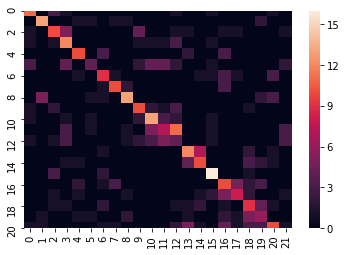

In [9]:
cm = confusion_matrix(test_y,baseline_pred)
sns.heatmap(cm)

In [ ]:
# save baseline model
# joblib.dump(gbm_model,'../output/baseline.m')